In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score 

from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import eli5
pd.options.display.float_format = '{:,.1f}'.format

from eli5.formatters import format_as_dataframe


import warnings
warnings.filterwarnings("ignore")

In [112]:
# data26 = pd.read_csv('data2601.csv', sep=';')
# data26.head()

In [113]:
# data26[(data26['iso3_o'] == 'USA') & (data26['iso3_d'] == 'DEU')]

In [114]:
# data26[(data26['iso3_o'] == 'DEU') & (data26['iso3_d'] == 'USA')]

## Reading and preprocessing data

In [115]:
data = pd.read_csv('thesis_data.csv', sep=';')
data.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,gdp_o,gdp_d,rta,HHI_value,tr_flows,MS
0,2007,ALB,AUT,0,"812,933",0,"10701011,968","386439118,848",1,"0,34",38736,"0,00000879375034955022"
1,2007,ALB,DEU,0,"1493,096",0,"10701011,968","3435506696,192",1,"0,34",1000,"0,0000000258199272828224"
2,2007,ALB,GRC,1,"500,124",0,"10701011,968","318668275,712",1,"0,34",11904,"0,00000269812421107873"
3,2007,ALB,ITA,0,"611,763",0,"10701011,968","2203972534,272",1,"0,34",7921,"0,000000514351151477611"
4,2007,DZA,CAN,0,"6747,007",1,"134977871,872","1457872830,464",0,"0,14",1830,"0,000000180775516808116"


In [116]:
data[(data['iso3_o'] == 'USA') & (data['iso3_d'] == 'DEU')]

,year,iso3_o,iso3_d,contig,dist,comlang_off,gdp_o,gdp_d,rta,HHI_value,tr_flows,MS


In [117]:
data[(data['iso3_o'] == 'DEU') & (data['iso3_d'] == 'USA')]

,year,iso3_o,iso3_d,contig,dist,comlang_off,gdp_o,gdp_d,rta,HHI_value,tr_flows,MS


In [118]:
data['dist'] = data['dist'].apply(lambda row: row.replace(',','.') if (',' in row) else row)
data['gdp_o'] = data['gdp_o'].apply(lambda row: row.replace(',','.') if (',' in row) else row)
data['gdp_d'] = data['gdp_d'].apply(lambda row: row.replace(',','.') if (',' in row) else row)
data['HHI_value'] = data['HHI_value'].apply(lambda row: row.replace(',','.') if (',' in row) else row)
data['MS'] = data['MS'].apply(lambda row: row.replace(',','.') if (',' in row) else row)
data['tr_flows'] = data['tr_flows'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [119]:
data['dist'] = pd.to_numeric(data['dist'], downcast="float")
data['gdp_o'] = pd.to_numeric(data['gdp_o'], downcast="float")
data['gdp_d'] = pd.to_numeric(data['gdp_d'], downcast="float")
data['HHI_value'] = pd.to_numeric(data['HHI_value'], downcast="float")
data['MS'] = pd.to_numeric(data['MS'], downcast="float")
data['tr_flows'] = pd.to_numeric(data['tr_flows'], downcast="float")

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48505 entries, 0 to 48504
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         48505 non-null  int64  
 1   iso3_o       48505 non-null  object 
 2   iso3_d       48505 non-null  object 
 3   contig       48505 non-null  int64  
 4   dist         48505 non-null  float32
 5   comlang_off  48505 non-null  int64  
 6   gdp_o        48505 non-null  float32
 7   gdp_d        48505 non-null  float32
 8   rta          48505 non-null  int64  
 9   HHI_value    48505 non-null  float32
 10  tr_flows     48505 non-null  float32
 11  MS           48505 non-null  float32
dtypes: float32(6), int64(4), object(2)
memory usage: 3.3+ MB


##  Regression (model 4)
ln(trade flows) = ln(dist) + dummy_o + dummy_d + RTA + comlang_off+contig

In [121]:
data_model_4 = data[['dist','tr_flows','rta','contig','comlang_off','iso3_o','iso3_d']]

In [122]:
data_log = data_model_4[['rta','contig','comlang_off','iso3_o','iso3_d']]
data_log['tr_flows_log'] = np.log(data_model_4['tr_flows'])
data_log['dist_log'] = np.log(data_model_4['dist'])

In [123]:
#numeric = ['tr_flows_log','dist_log']

In [124]:
# scaler = StandardScaler()
# scaler.fit(data_log[numeric])
# data_log[numeric] = scaler.transform(data_log[numeric])

In [125]:
data_log_transformed = pd.get_dummies(data_log, drop_first=True)

In [126]:
features = data_log_transformed.drop(['tr_flows_log'], axis=1)
target = data_log_transformed['tr_flows_log']

In [127]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [128]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)

model MAE:  1.5659610731901614
model RMSE:  4.373878214337316


In [129]:
feature_names = [col for col in list(features.columns)]

In [130]:
weights = eli5.explain_weights(model,top = 300, feature_names = feature_names, target_names = ['tr_flows_log'])

In [131]:
weights = format_as_dataframe(weights)

In [132]:
weights

,target,feature,weight
0,tr_flows_log,<BIAS>,13.4
1,tr_flows_log,iso3_o_IND,11.8
2,tr_flows_log,iso3_o_USA,11.8
3,tr_flows_log,iso3_o_CHN,11.6
4,tr_flows_log,iso3_o_DEU,11.4
...,...,...,...
285,tr_flows_log,iso3_d_STP,-3.0
286,tr_flows_log,iso3_d_KNA,-3.4
287,tr_flows_log,iso3_d_FSM,-3.5
288,tr_flows_log,iso3_d_AND,-3.5


In [133]:
residual = (target_valid - predicted_valid)

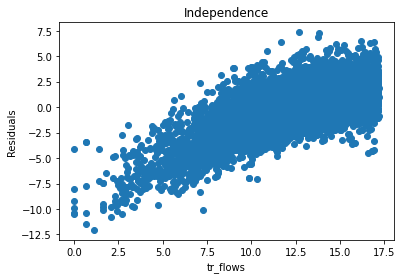

In [134]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows')
plt.ylabel('Residuals')
plt.show()

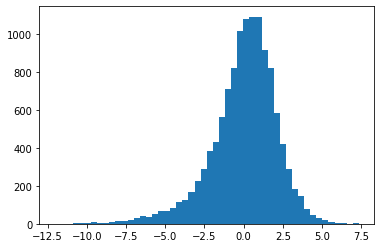

In [135]:
plt.hist(residual, bins =50)

plt.show()

## Regression (model augmented)
1. ln(tr_flows_corrected) = ln(dist)+dummy_o + dummy_d + (-4)*RTA+(-4)*comlang_off+(-4)*contig, 
2. where ln(tr_flows_corrected) = ln(trade flows) +4 * MS * HHI

In [136]:
data.describe()

,year,contig,dist,comlang_off,gdp_o,gdp_d,rta,HHI_value,tr_flows,MS
count,"48,505.0","48,505.0","48,505.0","48,505.0","48,505.0","48,505.0","48,505.0","48,505.0","48,505.0","48,505.0"
mean,"2,011.0",0.0,"6,782.3",0.2,"1,042,675,520.0","542,900,096.0",0.3,0.1,"3,388,584.8",0.0
std,2.5,0.2,"4,540.5",0.4,"2,307,732,480.0","1,726,341,632.0",0.5,0.1,"5,848,244.0",0.0
min,"2,007.0",0.0,59.6,0.0,"318,522.3","123,005.1",0.0,0.0,1.0,0.0
25%,"2,009.0",0.0,"2,742.3",0.0,"97,525,384.0","14,440,676.0",0.0,0.1,"69,888.0",0.0
50%,"2,011.0",0.0,"6,446.8",0.0,"289,548,384.0","55,348,000.0",0.0,0.1,"608,933.0",0.0
75%,"2,013.0",0.0,"9,657.0",0.0,"926,283,264.0","318,907,936.0",1.0,0.1,"3,755,956.0",0.0
max,"2,015.0",1.0,"19,812.0",1.0,"18,036,647,936.0","18,036,647,936.0",1.0,0.9,"28,720,544.0",1.0


In [137]:
data_model_augmented = data[['dist','tr_flows','rta','contig','comlang_off','iso3_o','iso3_d','HHI_value','MS']]

In [138]:
data_log = data_model_augmented[['iso3_o','iso3_d']]
data_log['correction_term'] = 4 * data_model_augmented['MS'] * data_model_augmented['HHI_value']
data_log['tr_flows_corrected'] = np.log(data_model_augmented['tr_flows']) + 4 * data_model_augmented['MS'] * data_model_augmented['HHI_value']
data_log['dist_log'] = np.log(data_model_augmented['dist'])
data_log['4_rta'] = data_model_augmented['rta'] * -4
data_log['4_comlang_off'] = data_model_augmented['comlang_off'] * -4
data_log['4_contig'] = data_model_augmented['contig'] * -4

In [139]:
data_log

,iso3_o,iso3_d,correction_term,tr_flows_corrected,dist_log,4_rta,4_comlang_off,4_contig
0,ALB,AUT,0.0,10.6,6.7,-4,0,0
1,ALB,DEU,0.0,6.9,7.3,-4,0,0
2,ALB,GRC,0.0,9.4,6.2,-4,0,-4
3,ALB,ITA,0.0,9.0,6.4,-4,0,0
4,DZA,CAN,0.0,7.5,8.8,0,-4,0
...,...,...,...,...,...,...,...,...
48500,ZMB,BWA,0.0,9.9,7.0,-4,-4,-4
48501,ZMB,MWI,0.0,10.9,6.4,-4,-4,-4
48502,ZMB,NAM,0.0,8.4,7.3,-4,-4,-4
48503,ZMB,ZAF,0.0,10.8,7.7,-4,-4,0


In [140]:
#numeric = ['tr_flows_corrected','dist_log']

In [141]:
# scaler = StandardScaler()
# scaler.fit(data_log[numeric])
# data_log[numeric] = scaler.transform(data_log[numeric])

In [142]:
data_log_transformed = pd.get_dummies(data_log, drop_first=True)

In [143]:
features = data_log_transformed.drop(['tr_flows_corrected'], axis=1)
target = data_log_transformed['tr_flows_corrected']

In [144]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, 
    target, 
    train_size=0.75, 
    test_size=0.25, 
    random_state=12345)

In [145]:
features_train.drop(['correction_term'], axis=1)
correction_term = features_valid['correction_term']
features_valid.drop(['correction_term'], axis=1)

,dist_log,4_rta,4_comlang_off,4_contig,iso3_o_ALB,iso3_o_AND,iso3_o_ARE,iso3_o_ARG,iso3_o_ARM,iso3_o_ATG,...,iso3_d_URY,iso3_d_USA,iso3_d_VCT,iso3_d_VEN,iso3_d_VNM,iso3_d_WSM,iso3_d_YEM,iso3_d_ZAF,iso3_d_ZMB,iso3_d_ZWE
43414,8.0,-4,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40284,8.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18642,9.1,-4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21913,8.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15366,7.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27530,9.8,0,-4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33182,7.6,-4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39305,8.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17419,8.0,-4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
MAE = mean_absolute_error(target_valid,predicted_valid)
RMSE = mean_squared_error(target_valid,predicted_valid)

print('model MAE: ', MAE)
print('model RMSE: ', RMSE)

model MAE:  1.5160499034943582
model RMSE:  4.1754485870958025


In [147]:
feature_names = [col for col in list(features.columns)]

In [148]:
weights = eli5.explain_weights(model,top = 300, feature_names = feature_names, target_names = ['tr_flows_corrected'])

In [149]:
weights = format_as_dataframe(weights)

In [150]:
weights

,target,feature,weight
0,tr_flows_corrected,correction_term,37.0
1,tr_flows_corrected,<BIAS>,12.2
2,tr_flows_corrected,iso3_o_IND,11.4
3,tr_flows_corrected,iso3_o_USA,11.3
4,tr_flows_corrected,iso3_o_CHN,11.2
...,...,...,...
286,tr_flows_corrected,iso3_d_KNA,-3.5
287,tr_flows_corrected,iso3_d_AND,-3.5
288,tr_flows_corrected,iso3_d_KIR,-3.8
289,tr_flows_corrected,iso3_d_STP,-4.3


In [151]:
residual = (target_valid - predicted_valid)

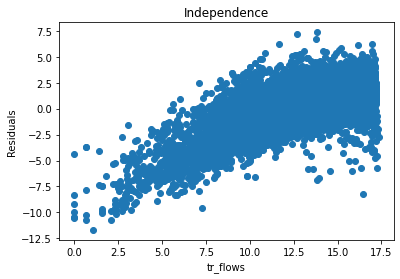

In [152]:
plt.scatter(target_valid, residual)
plt.title('Independence')
plt.xlabel('tr_flows')
plt.ylabel('Residuals')
plt.show()

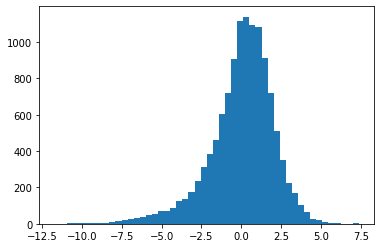

In [153]:
plt.hist(residual, bins =50)

plt.show()

## Professor asked for 

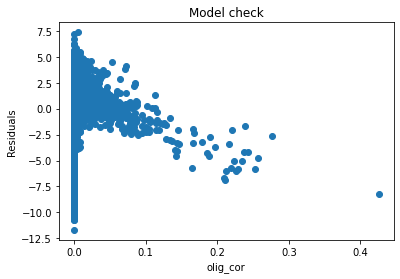

In [154]:
plt.scatter(correction_term, residual)
plt.title('Model check')
plt.xlabel('olig_cor')
plt.ylabel('Residuals')
plt.show()